In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Gala_dynesty_orbit import *
from Stream_get_data import *

In [69]:
logM, Rs, q, dirx, diry, dirz = 11.0, 10.0, 0.9, 1.0, 1.0, 1.0
logm, rs = 8.0, 1.0
pos_init_x, pos_init_y, pos_init_z = -50, 0, 0

units = [auni.kpc, auni.km / auni.s, auni.Msun, auni.Gyr, auni.rad]
mat = get_mat(dirx, diry, dirz)
pot = gp.NFWPotential(10**logM, Rs, 1, 1, q, R=mat, units=units)

vel_init_x, vel_init_y, vel_init_z = 0, 0.7*pot.circular_velocity([pos_init_x, pos_init_y, pos_init_z]).item().value,0
t_end = 4

params = np.array([logM, Rs, q, dirx, diry, dirz, logm, rs, pos_init_x, pos_init_y, pos_init_z, vel_init_x, vel_init_y, vel_init_z, t_end])


(-52.8098530532775, 2.514754907298929, -0.7046542554961441, 0.758557167759499)

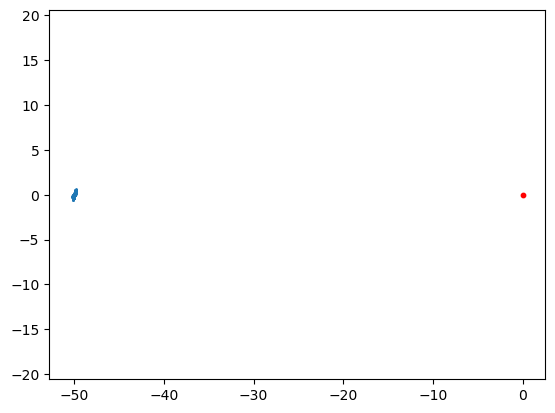

In [70]:
xy_stream = model_stream(params, dt=-10)
plt.scatter(xy_stream[:,0], xy_stream[:,1], s=1)
plt.scatter(0,0, c='r', s=10)
plt.axis('equal')

(-0.12784748296178042,
 2.6847971421973886,
 -0.5382027833740686,
 11.302258450855438)

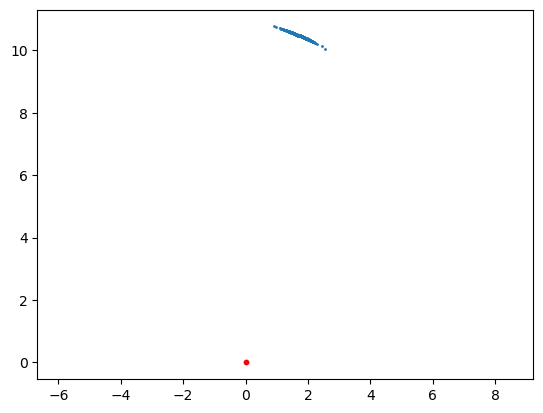

In [10]:
params = [
    12,  # logM
    20,  # Rs
    0.9, # q
    0.0, 1.0, 0.0,  # direction x, y, z
    9,   # logm (progenitor mass)
    0.1, # rs (progenitor scale)
    8.0, 0.0, 0.0,  # pos_init_x, pos_init_y, pos_init_z
    0.0, 220.0, 0.0,  # vel_init_x, vel_init_y, vel_init_z
    3.5    # t_end (in Gyr)
]

xy_stream = model_stream(params)
plt.scatter(xy_stream[:,0], xy_stream[:,1], s=1)
plt.scatter(0,0, c='r', s=10)
plt.axis('equal')

(-5.646251662218805,
 0.26886912677232405,
 -0.20220424715957663,
 3.5440194887353975)

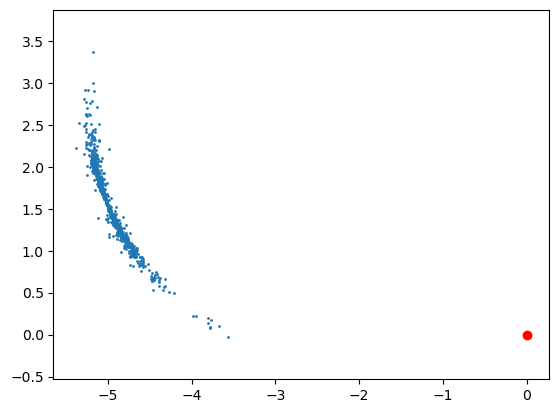

In [8]:
from astropy import units as auni
import gala.potential as gp
import gala.dynamics as gd
import gala.integrate as gi
from gala.dynamics import mockstream as ms

units = [auni.kpc, auni.km / auni.s, auni.Msun, auni.Gyr, auni.rad]


w0 = gd.PhaseSpacePosition(
    pos=np.array([pos_init_x, pos_init_y, pos_init_z]) * auni.kpc,
    vel=np.array([vel_init_x, vel_init_y, vel_init_z]) * auni.km / auni.s,
)

mat = get_mat(dirx, diry, dirz)

pot = gp.NFWPotential(10**logM, Rs, 1, 1, q, R=mat, units=units)

H = gp.Hamiltonian(pot)

df = ms.FardalStreamDF(gala_modified=True)

gen = ms.MockStreamGenerator(df, H)

prog_pot = gp.PlummerPotential(m=logm, b=rs, units=units)
gen = ms.MockStreamGenerator(df, H, progenitor_potential=prog_pot)
dt = 10 * auni.Myr
stream, prog = gen.run(w0, logm * auni.Msun, dt=dt, n_steps=int(t_end * auni.Gyr/ dt))
xy_stream = stream.xyz.T[:, :2]

plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1)
plt.scatter(0,0, c='r')
plt.axis('equal')

In [9]:
x = xy_stream[:, 0].value
y = xy_stream[:, 1].value

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

n_ang = 144
theta_bin = np.arange(0, 360, 360/n_ang) * np.pi/180

theta_data = []
r_data = []
sig_data = []

for i in range(n_ang-1):
    idx = np.where((theta >= theta_bin[i]) & (theta < theta_bin[i+1]))[0]

    if len(idx) > 10:
        r_in = r[idx]

        # GaussianMixture(n_components=1, covariance_type='full').fit(XX.reshape(-1, 1))
        print(i)

        theta_data.append((theta_bin[i] + theta_bin[i+1])/2)
        r_data.append(np.mean(r_in))
        sig_data.append(np.std(r_in))

theta_data = np.array(theta_data)
r_data = np.array(r_data)
sig_data = np.array(sig_data)

x_data = r_data * np.cos(theta_data)
y_data = r_data * np.sin(theta_data)

61
62
63
64
65
66
67
68


(-5.644333230962924,
 0.26877777290299637,
 -0.6277417629655582,
 4.30554460054801)

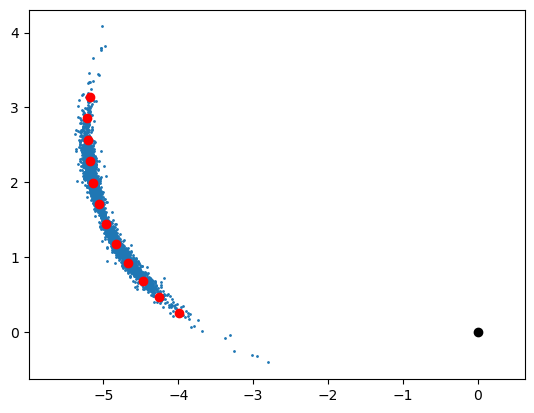

In [7]:
plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1)
plt.scatter(x_data, y_data, c='r')
plt.scatter(0,0, c='k')
plt.axis('equal')

(-27.286712966841126,
 1.2993672841352917,
 -74.35356190960063,
 3.540645805219078)

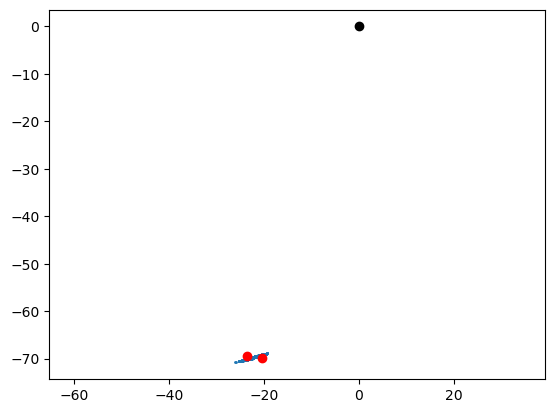

In [3]:
from Stream_get_data import *

ndim = 15
p = np.random.uniform(0, 1, ndim)
params = prior_transform_data(p)
xy_stream = model_stream(params)
dict_data = get_track(xy_stream, n_ang=144)

# get_data_stream

plt.scatter(xy_stream[:, 0], xy_stream[:, 1], s=1)
plt.scatter(dict_data['x'], dict_data['y'], c='r')
plt.scatter(0,0, c='k')
plt.axis('equal')

In [1]:
from Stream_get_data import *
dict_data, params_data = get_data_stream(0.9, seed=22, n_ang=72, ndim=15)

77.08277555557352 [1.17286967]
2
29.29133951987891 [2.66319897]
3.9403766630955843 [0.9570774]
14.210105032950665 [0.59538626]
107.33957105213476 [0.37882353]
45.723350302604906 [1.26844231]
2
157.21932381833753 [0.54186589]
122.38513107634112 [0.46092632]
79.91460854711163 [0.30333421]
38.29964800249378 [0.96757032]
1
17.412567472629824 [0.10908223]
23.293891915944812 [0.28474913]
28.422169872267617 [0.33720113]
80.29935471721444 [1.20386176]
170.568312073963 [3.5288436]
106.8917744592286 [0.85182595]
75.15372073826344 [0.67029773]
9.624374923116537 [2.28936938]
38.28688974803675 [0.75094751]
2
15.770927454144376 [0.46978555]
85.87416614459039 [0.39932807]
40.703629849453435 [0.59062436]
233.34258936974246 [0.24424733]
60.363782464174996 [0.76904363]
2
1.1773442585007965 [0.29059748]
126.44029376131189 [0.67811877]
126.86803308936467 [0.21921221]
78.32668764489925 [1.78207195]
1
216.9642039505801 [0.1651947]
173.78957502160912 [0.26822028]
4.129321631043904 [3.38206943]
21.23958822412

(-7.0937265426122025, 7.372041742096942, -5.582514998510385, 3.147587354843975)

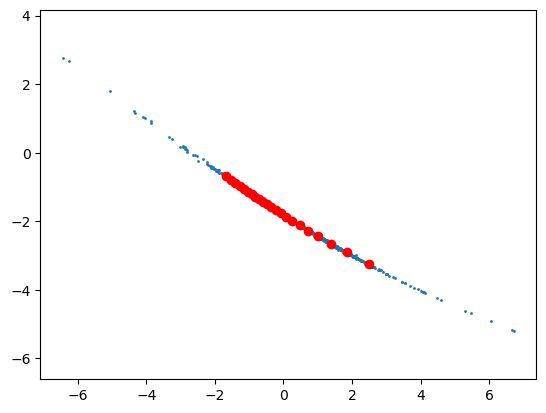

In [2]:
xy_stream_data = model_stream(params_data)
plt.scatter(xy_stream_data[:, 0], xy_stream_data[:, 1], s=1)
plt.scatter(dict_data['x'], dict_data['y'], c='r')
plt.axis('equal')


(-1.4986454714649646,
 1.40113005056482,
 0.24763718933060547,
 1.1267648809436466)

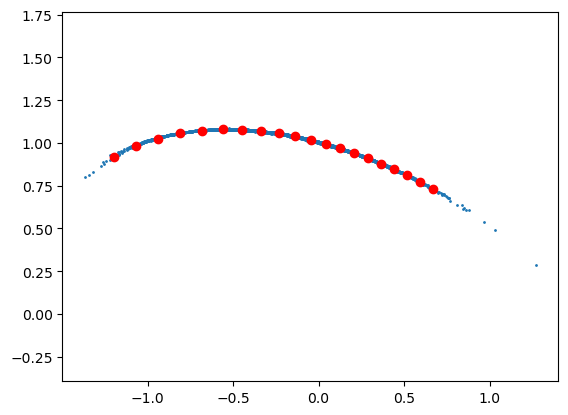

In [2]:
xy_stream_data = model_stream(params_data)
plt.scatter(xy_stream_data[:, 0], xy_stream_data[:, 1], s=1)
plt.scatter(dict_data['x'], dict_data['y'], c='r')
plt.axis('equal')


In [5]:

units = [auni.kpc, auni.km / auni.s, auni.Msun, auni.Gyr, auni.rad]
mat = get_mat(params_data[3], params_data[4], params_data[5])
pot = gp.NFWPotential(10**params_data[0], params_data[1], 1, 1, params_data[2], R=mat, units=units)

In [8]:
params_data[-7:-4]

[1.0519051973501945, 0, 0.8634420324791805]

In [13]:
radius = np.sqrt( np.sum(np.array(params_data[-7:-4])**2))
vc = np.sqrt( np.sum(np.array(params_data[-4:-1])**2))
pot.circular_velocity(params_data[-7:-4])


<Quantity [101.31674022] km / s>

In [15]:
radius, vc

(1.3608955461989467, 142.9037692141001)